# Photo to prints
### Elijah Peake

## Importing libraries

In [175]:
import skimage.io as skio
import skimage.color as skc
import skimage.feature as skfeat
import skimage.filters as skfill
import skimage.morphology as skmorph
import skimage.measure as skmeasure
import skimage.exposure as ske
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Building our algorithm

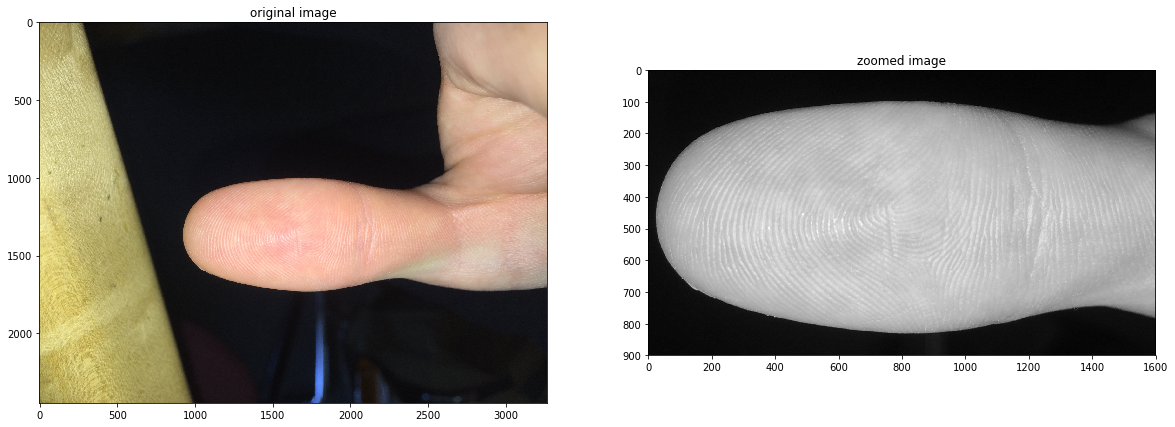

In [176]:
my_finger = skio.imread("finger.JPG")
gray_finger = skc.rgb2gray(my_finger)
gray_finger_zoom = gray_finger[900:1800, 900:2500]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('original image')
ax1.imshow(my_finger, cmap='gray')
ax2.set_title('zoomed image')
ax2.imshow(gray_finger_zoom, cmap='gray')

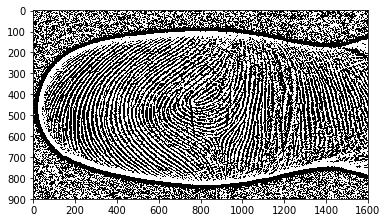

In [177]:
block_size = 51
local_thresh = skfill.threshold_local(gray_finger_zoom, block_size)
binary_local = gray_finger_zoom > local_thresh
binary_local_no_mask = binary_local.copy()
fig = plt.figure()
plt.imshow(binary_local, cmap='gray')

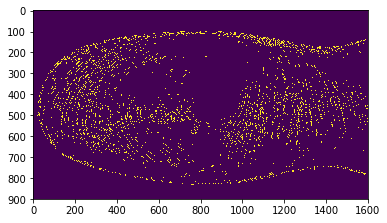

In [178]:
edges = skfeat.canny(gray_finger_zoom, sigma=.2)
fig = plt.figure()
plt.imshow(edges)

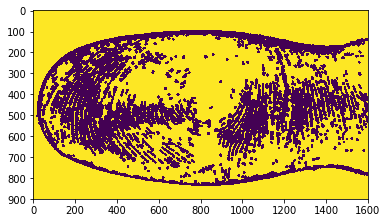

In [179]:
dialated_edges = skmorph.binary_dilation(edges, selem=skmorph.disk(5))
fig = plt.figure()
plt.imshow(~dialated_edges)

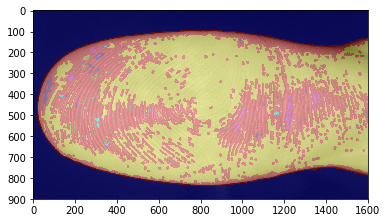

In [180]:
markers = skmeasure.label(~dialated_edges)
fig = plt.figure()
plt.imshow(skc.label2rgb(markers, image=gray_finger_zoom))

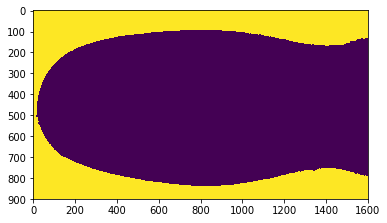

In [181]:
mask = markers == 1  # because first is black
fig = plt.figure()
plt.imshow(mask)

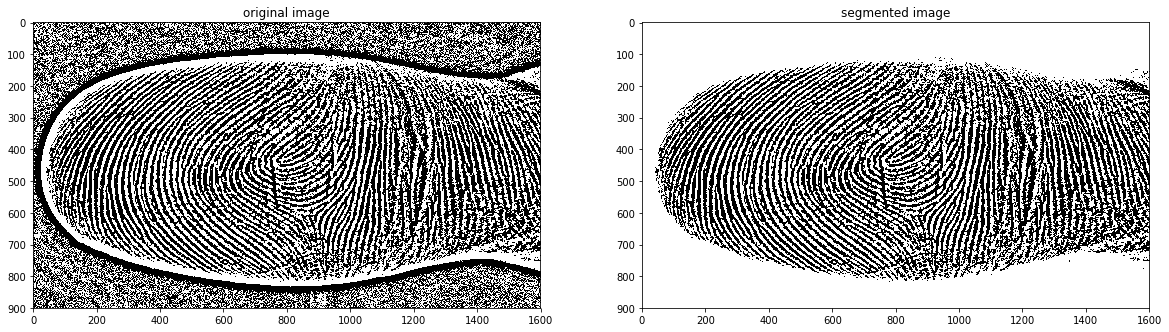

In [182]:
mask_dilate = skmorph.dilation(mask, selem=skmorph.disk(10))
binary_local[mask_dilate == 1] = 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('original image')
ax1.imshow(binary_local_no_mask, cmap='gray')
ax2.set_title('segmented image')
ax2.imshow(binary_local, cmap='gray')

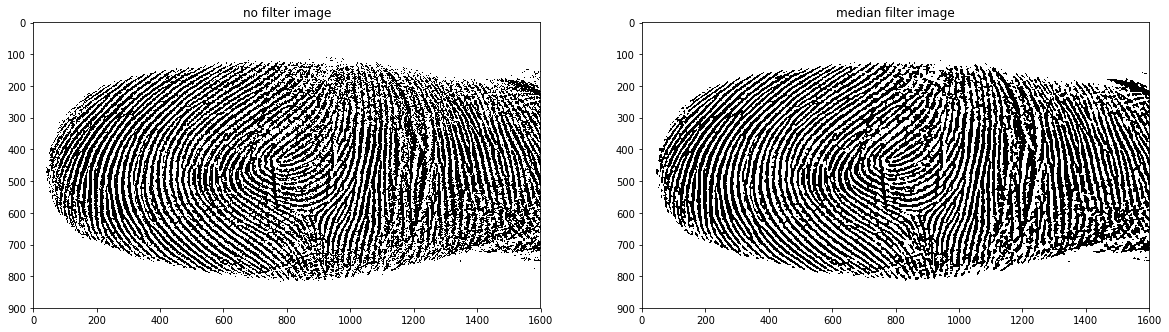

In [183]:
median_with_mask = skfill.median(binary_local, selem=skmorph.disk(3))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('no filter image')
ax1.imshow(binary_local, cmap='gray')
ax2.set_title('median filter image')
ax2.imshow(median_with_mask, cmap='gray')

## Playing with other parameters

In [184]:
def cropped_photo_to_print(img, block_size, disk_size):
    local_thresh = skfill.threshold_local(img, block_size)
    binary_local = img > local_thresh
    binary_local_no_mask = binary_local.copy()
    edges = skfeat.canny(img, sigma=.2)
    dialated_edges = skmorph.binary_dilation(edges, selem=skmorph.disk(5))
    markers = skmeasure.label(~dialated_edges)
    mask = markers == 1
    mask_dilate = skmorph.dilation(mask, selem=skmorph.disk(10))
    binary_local[mask_dilate == 1] = 1
    median_with_mask = skfill.median(binary_local, selem=skmorph.disk(disk_size))
    
    return (binary_local_no_mask, binary_local, median_with_mask)

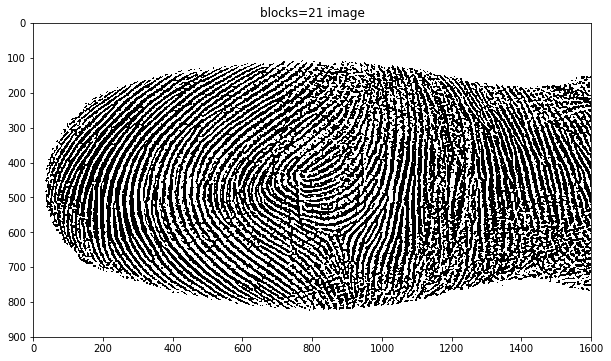

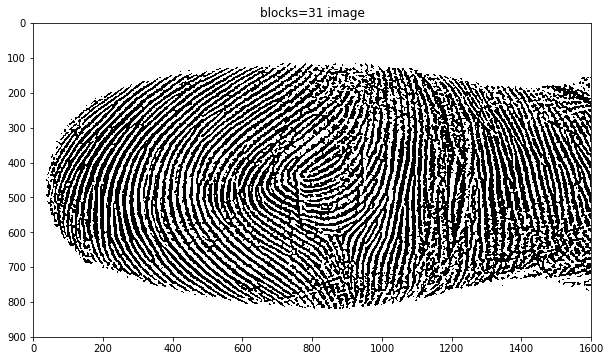

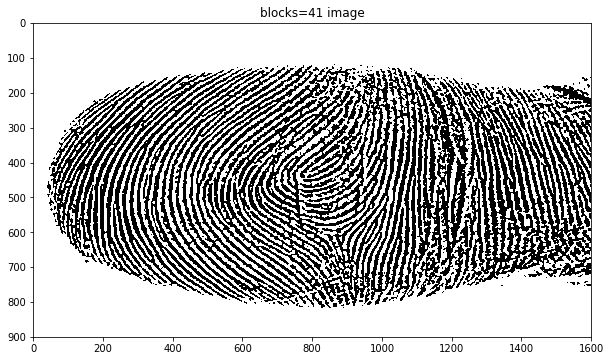

In [185]:
img_21_3 = cropped_photo_to_print(gray_finger_zoom, 21, 3)
img_31_3 = cropped_photo_to_print(gray_finger_zoom, 31, 3)
img_41_3 = cropped_photo_to_print(gray_finger_zoom, 41, 3)

fig = plt.figure(figsize=(10, 10))
plt.title('blocks=21 image')
plt.imshow(img_21_3[2], cmap='gray')

fig = plt.figure(figsize=(10, 10))
plt.title('blocks=31 image')
plt.imshow(img_31_3[2], cmap='gray')

fig = plt.figure(figsize=(10, 10))
plt.title('blocks=41 image')
plt.imshow(img_41_3[2], cmap='gray')


Lines get thicker as the blocksize goes up, and the print is even wider with a lower blocksize

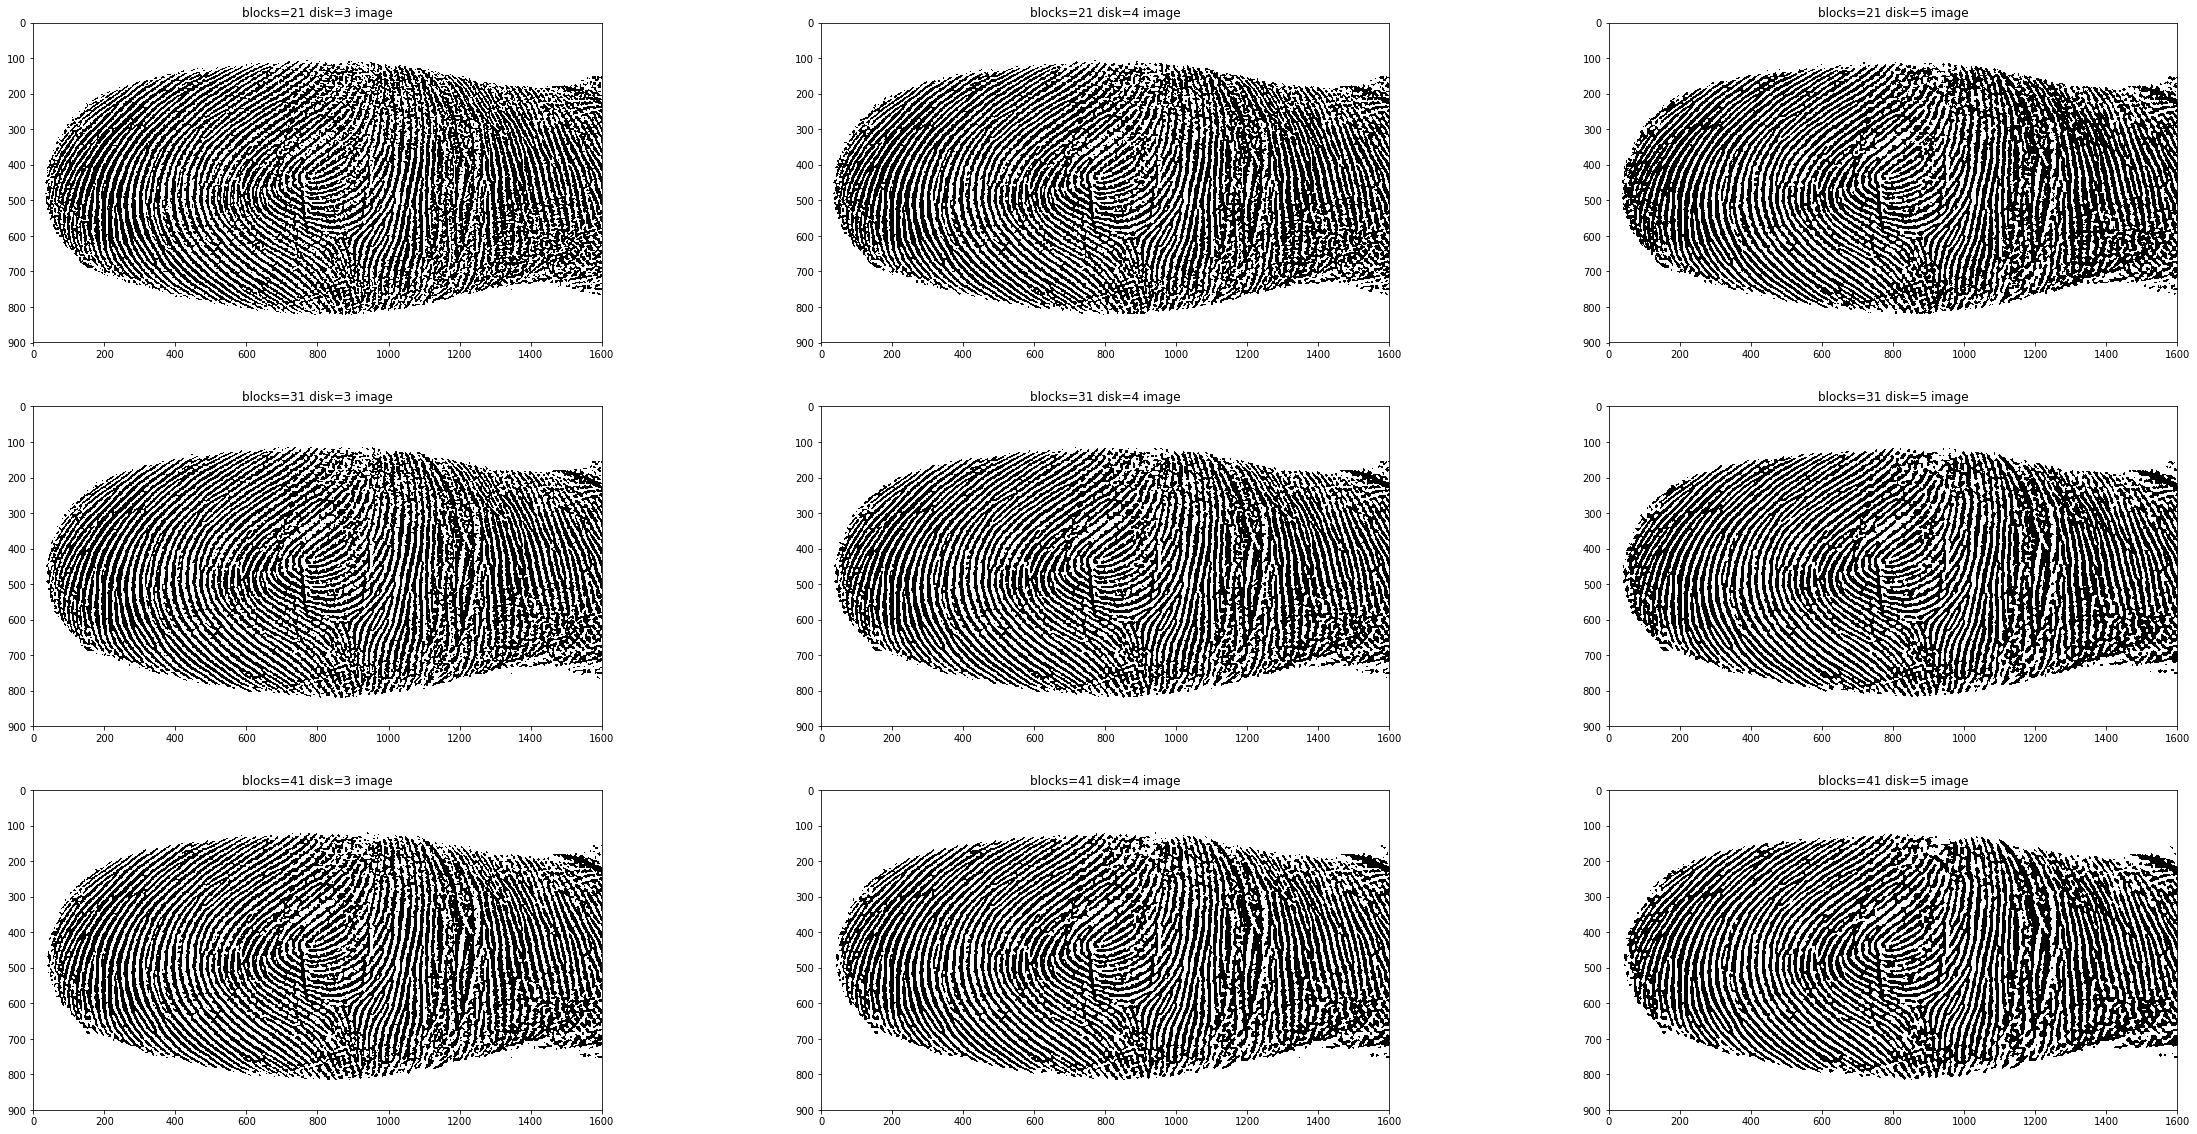

In [186]:
img_21_4 = cropped_photo_to_print(gray_finger_zoom, 21, 4)
img_21_5 = cropped_photo_to_print(gray_finger_zoom, 21, 5)
img_31_4 = cropped_photo_to_print(gray_finger_zoom, 31, 4)
img_31_5 = cropped_photo_to_print(gray_finger_zoom, 31, 5)
img_41_4 = cropped_photo_to_print(gray_finger_zoom, 41, 4)
img_41_5 = cropped_photo_to_print(gray_finger_zoom, 41, 5)

fig, ax = plt.subplots(3, 3, figsize=(40, 20))
ax[0,0].set_title('blocks=21 disk=3 image')
ax[0,0].imshow(img_21_3[2], cmap='gray')
ax[0,1].set_title('blocks=21 disk=4 image')
ax[0,1].imshow(img_21_4[2], cmap='gray')
ax[0,2].set_title('blocks=21 disk=5 image')
ax[0,2].imshow(img_21_5[2], cmap='gray')
ax[1,0].set_title('blocks=31 disk=3 image')
ax[1,0].imshow(img_31_3[2], cmap='gray')
ax[1,1].set_title('blocks=31 disk=4 image')
ax[1,1].imshow(img_31_4[2], cmap='gray')
ax[1,2].set_title('blocks=31 disk=5 image')
ax[1,2].imshow(img_31_5[2], cmap='gray')
ax[2,0].set_title('blocks=41 disk=3 image')
ax[2,0].imshow(img_41_3[2], cmap='gray')
ax[2,1].set_title('blocks=41 disk=4 image')
ax[2,1].imshow(img_41_4[2], cmap='gray')
ax[2,2].set_title('blocks=41 disk=5 image')
ax[2,2].imshow(img_41_5[2], cmap='gray')

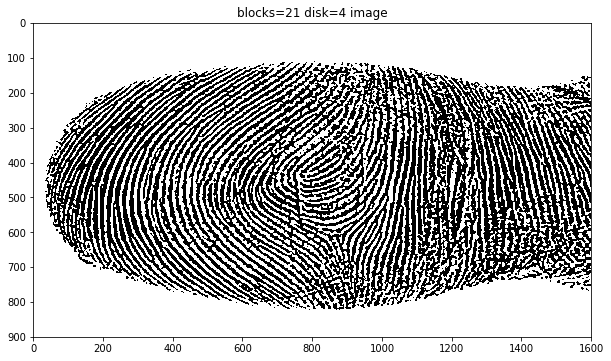

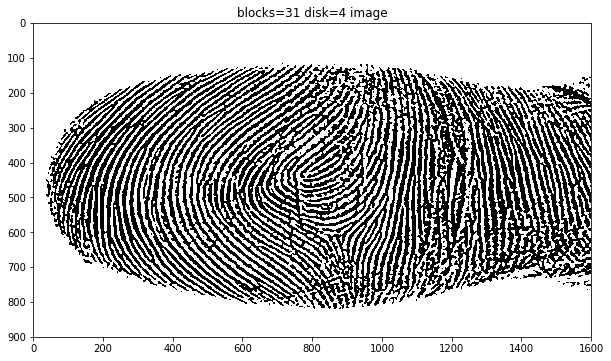

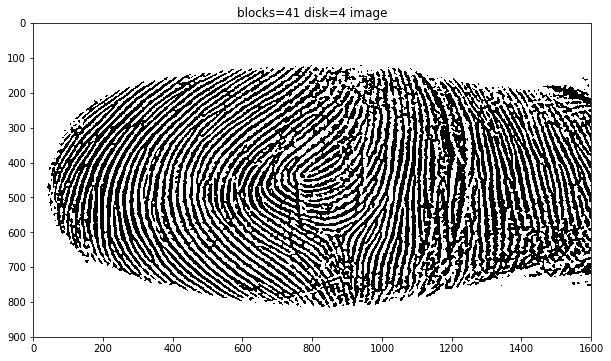

In [187]:
fig = plt.figure(figsize=(10, 10))
plt.title('blocks=21 disk=4 image')
plt.imshow(img_21_4[2], cmap='gray')

fig = plt.figure(figsize=(10, 10))
plt.title('blocks=31 disk=4 image')
plt.imshow(img_31_4[2], cmap='gray')

fig = plt.figure(figsize=(10, 10))
plt.title('blocks=41 disk=4 image')
plt.imshow(img_41_4[2], cmap='gray')


Looks like size 31 does the best job at balancing detail and smoothness.  Let's compare this to our photo before we were trying to optimize:

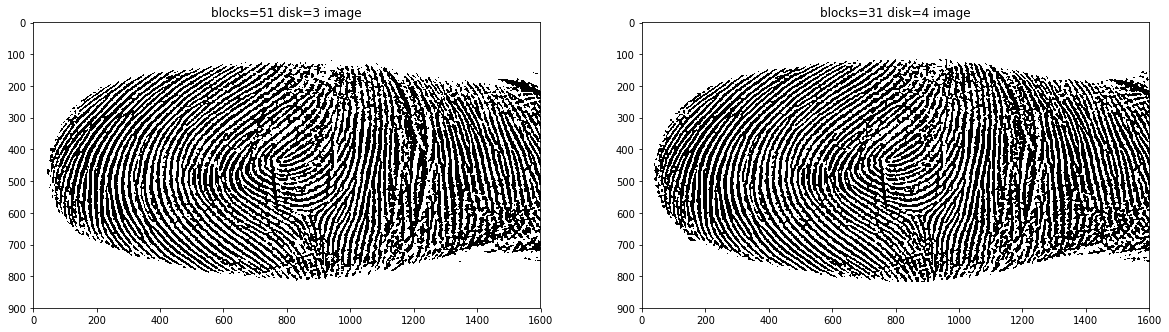

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('blocks=51 disk=3 image')
ax1.imshow(median_with_mask, cmap='gray')
ax2.set_title('blocks=31 disk=4 image')
ax2.imshow(img_31_4[2], cmap='gray')

Looks like this is deffinitely a better print.  Let's try this out with other people's fingers:

## Other people's fingers

### Alejandro

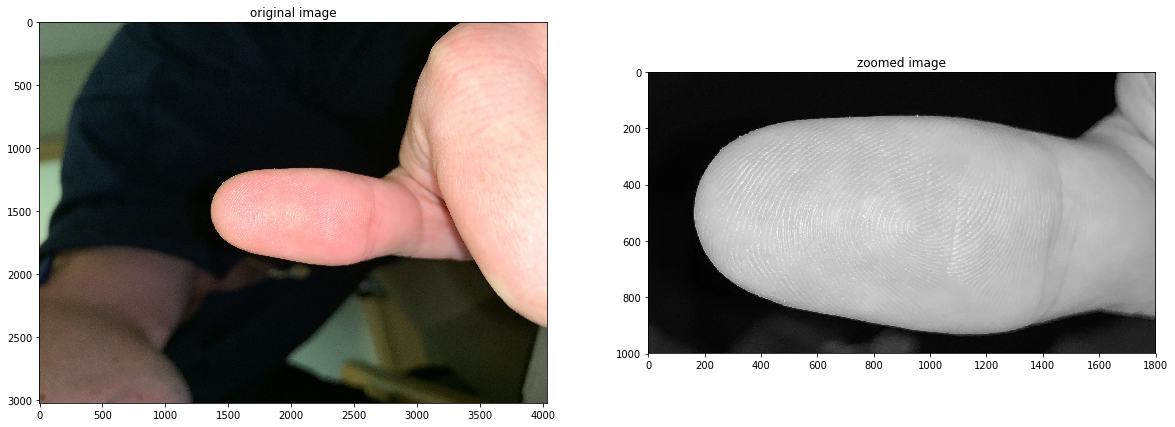

In [189]:
alejandro_finger = skio.imread("Alejandro1.jpeg")
ale_gray_finger = skc.rgb2gray(alejandro_finger)
ale_gray_finger_zoom = ale_gray_finger[1000:2000, 1200:3000]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('original image')
ax1.imshow(alejandro_finger, cmap='gray')
ax2.set_title('zoomed image')
ax2.imshow(ale_gray_finger_zoom, cmap='gray')

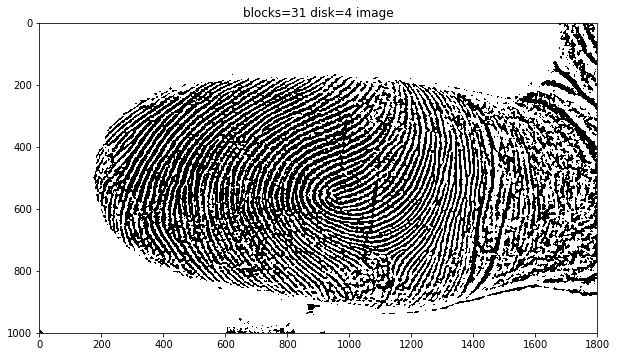

In [190]:
ale_print = cropped_photo_to_print(ale_gray_finger_zoom, 31, 4)

fig = plt.figure(figsize=(10, 10))
plt.title('blocks=31 disk=4 image')
plt.imshow(ale_print[2], cmap='gray')

Not bad, but there is a lot of junk around the thumb.  Maybe the mask was not as good..  Looking at the b/w image, maybe we need to threshold below a certain value of darkness before local thresholding.

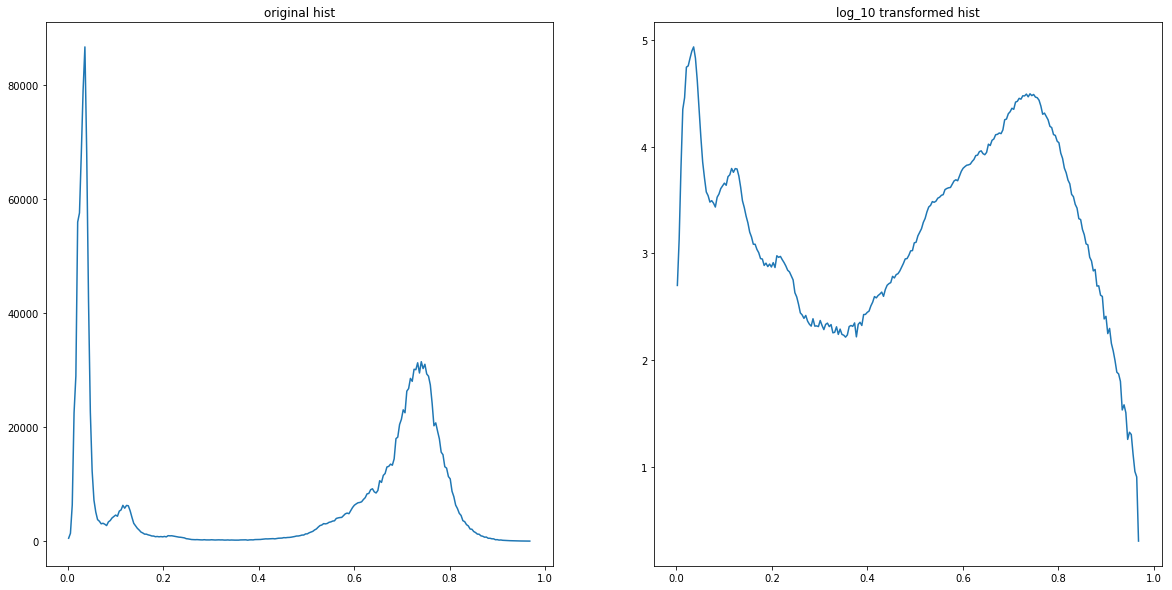

In [191]:
(count, binc) = ske.histogram(ale_gray_finger_zoom, 256)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('original hist')
ax1.plot(binc, count)
ax2.set_title('log_10 transformed hist')
ax2.plot(binc, np.log10(count))

Maybe we need to convert any value below .4 to zero.  Let's try it out:

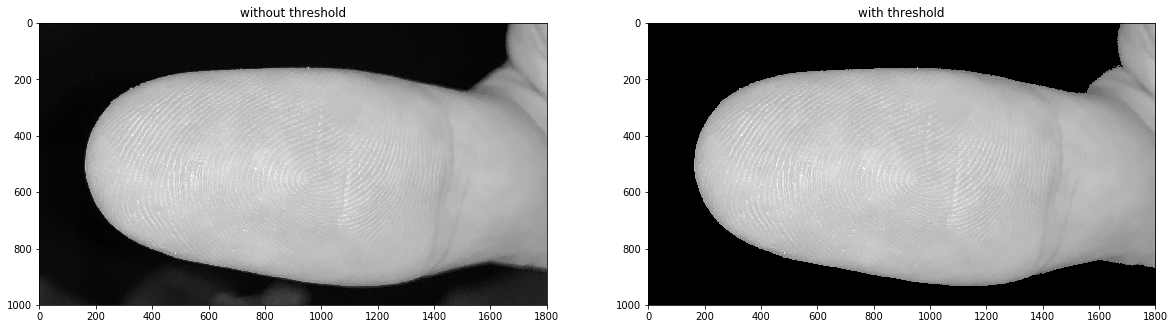

In [192]:
ale_gray_finger_zoom_copy = ale_gray_finger_zoom.copy()
ale_gray_finger_zoom[ale_gray_finger_zoom < .4] = 0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('without threshold')
ax1.imshow(ale_gray_finger_zoom_copy, cmap='gray')
ax2.set_title('with threshold')
ax2.imshow(ale_gray_finger_zoom, cmap='gray')

This might also make edge detection easier.

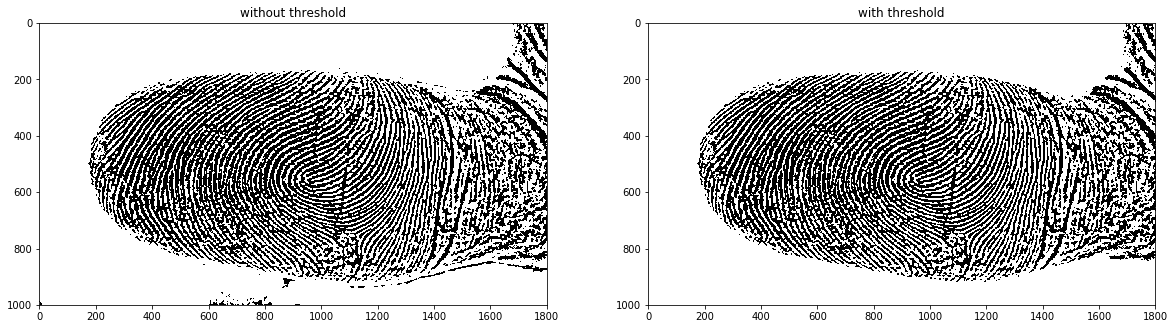

In [193]:
ale_print_new = cropped_photo_to_print(ale_gray_finger_zoom, 31, 4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('without threshold')
ax1.imshow(ale_print[2], cmap='gray')
ax2.set_title('with threshold')
ax2.imshow(ale_print_new[2], cmap='gray')

Much better!  Let's change the algorithm and see if it still works well with my print

In [194]:
def cropped_photo_to_print(img, block_size, disk_size):
    img[img < .4] = 0
    local_thresh = skfill.threshold_local(img, block_size)
    binary_local = img > local_thresh
    binary_local_no_mask = binary_local.copy()
    edges = skfeat.canny(img, sigma=.2)
    dialated_edges = skmorph.binary_dilation(edges, selem=skmorph.disk(5))
    markers = skmeasure.label(~dialated_edges)
    mask = markers == 1
    mask_dilate = skmorph.dilation(mask, selem=skmorph.disk(10))
    binary_local[mask_dilate == 1] = 1
    median_with_mask = skfill.median(binary_local, selem=skmorph.disk(disk_size))
    
    return (binary_local_no_mask, binary_local, median_with_mask)

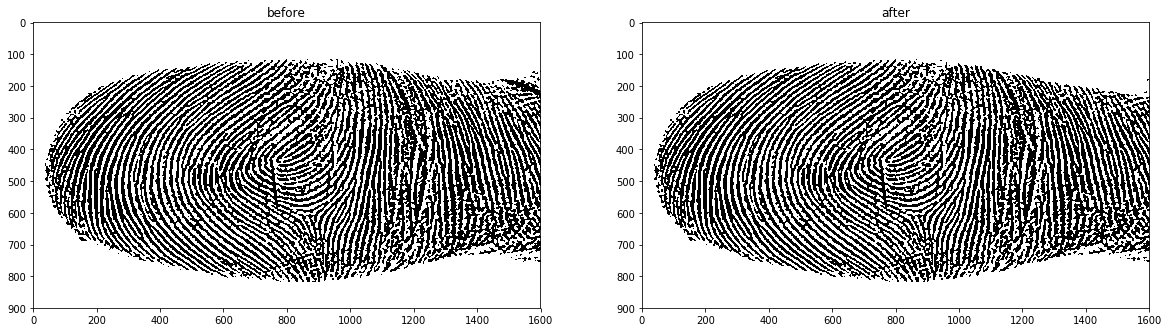

In [195]:
img_31_4_new = cropped_photo_to_print(gray_finger_zoom, 31, 4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('before')
ax1.imshow(img_31_4[2], cmap='gray')
ax2.set_title('after')
ax2.imshow(img_31_4_new[2], cmap='gray')

Still looking good! - if not, better

### Jack

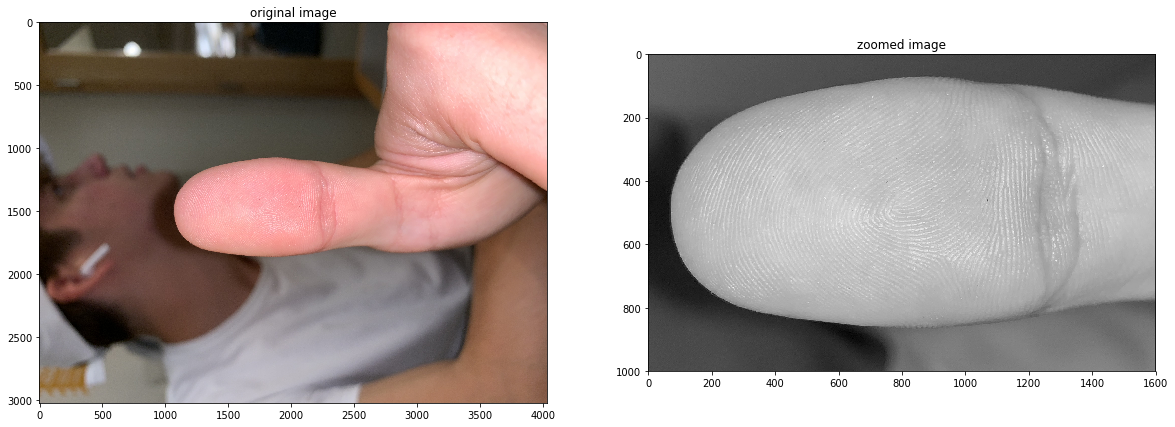

In [196]:
jack_finger = skio.imread("Jack1.jpeg")
jack_gray_finger = skc.rgb2gray(jack_finger)
jack_gray_finger_zoom = jack_gray_finger[1000:2000, 1000:2600]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('original image')
ax1.imshow(jack_finger, cmap='gray')
ax2.set_title('zoomed image')
ax2.imshow(jack_gray_finger_zoom, cmap='gray')

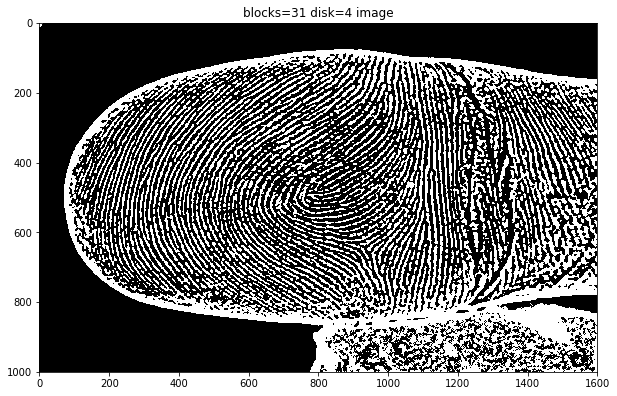

In [197]:
jack_print = cropped_photo_to_print(jack_gray_finger_zoom, 31, 4)

fig = plt.figure(figsize=(10, 10))
plt.title('blocks=31 disk=4 image')
plt.imshow(jack_print[2], cmap='gray')

Here we did not choose the right mask...

In [198]:
def photo_to_markers(img, block_size):
    img[img < .2] = 0
    local_thresh = skfill.threshold_local(img, block_size)
    binary_local = img > local_thresh
    edges = skfeat.canny(img, sigma=.2)
    dialated_edges = skmorph.binary_dilation(edges, selem=skmorph.disk(5))
    markers = skmeasure.label(~dialated_edges)
    
    return markers

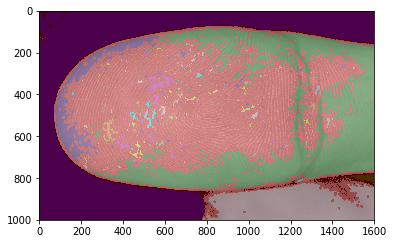

In [199]:
jack_markers = photo_to_markers(jack_gray_finger_zoom, 31)

fig = plt.figure()
plt.imshow(skc.label2rgb(jack_markers, image=jack_gray_finger_zoom))

In [200]:
corner_markers = jack_markers[::jack_markers.shape[0]-10, ::jack_markers.shape[1]-1]

/Users/epeake/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


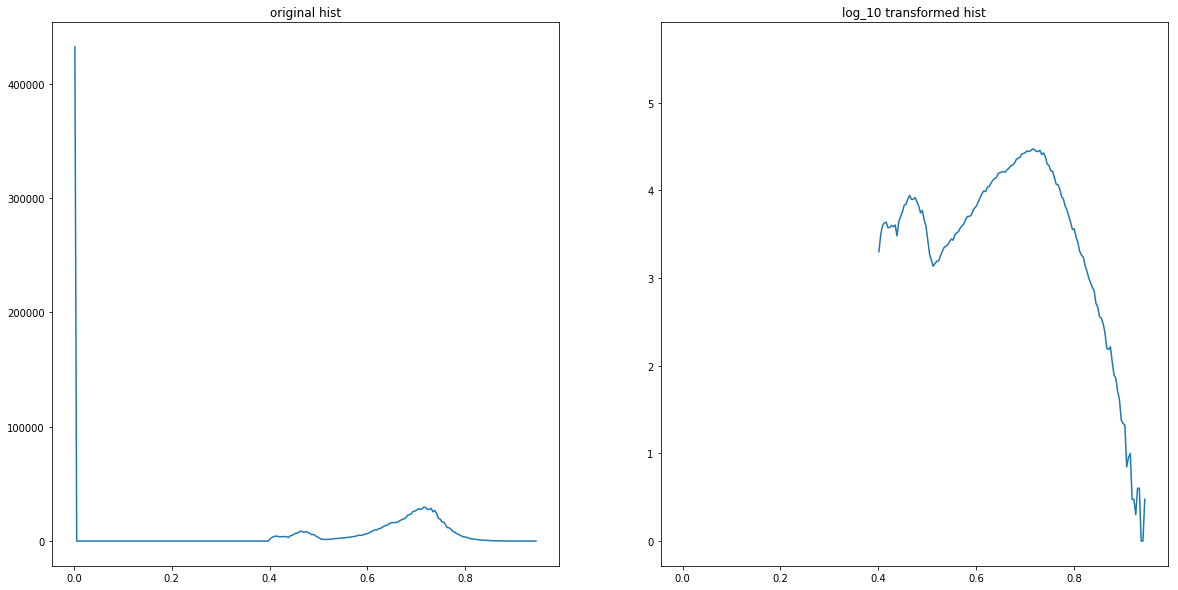

In [201]:
jack_gray_finger_zoom = jack_gray_finger[1000:2000, 1000:2600]
(count, binc) = ske.histogram(jack_gray_finger_zoom, 256)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('original hist')
ax1.plot(binc, count)
ax2.set_title('log_10 transformed hist')
ax2.plot(binc, np.log10(count))

now .4 isn't right... More like .5  Need an algorithm to seperate these...

In [202]:
def cropped_photo_to_print(img, block_size, disk_size):
    img[img < .55] = 0
    local_thresh = skfill.threshold_local(img, block_size)
    binary_local = img > local_thresh
    binary_local_no_mask = binary_local.copy()
    edges = skfeat.canny(img, sigma=.2)
    dialated_edges = skmorph.binary_dilation(edges, selem=skmorph.disk(5))
    markers = skmeasure.label(~dialated_edges)
    mask = markers == 1
    mask_dilate = skmorph.dilation(mask, selem=skmorph.disk(10))
    binary_local[mask_dilate == 1] = 1
    median_with_mask = skfill.median(binary_local, selem=skmorph.disk(disk_size))
    
    return (binary_local_no_mask, binary_local, median_with_mask)

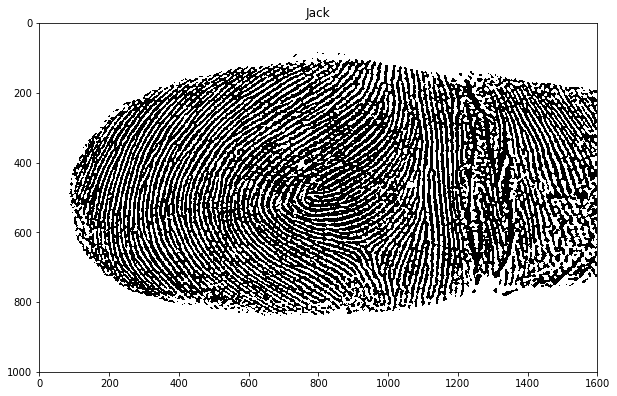

In [203]:
jack_print = cropped_photo_to_print(jack_gray_finger_zoom, 31, 4)

fig = plt.figure(figsize=(10, 10))
plt.title('Jack')
plt.imshow(jack_print[2], cmap='gray')

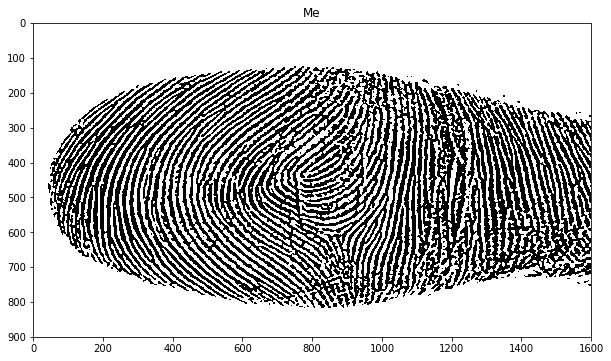

In [204]:
img_31_4_new = cropped_photo_to_print(gray_finger_zoom, 31, 4)

fig = plt.figure(figsize=(10, 10))
plt.title('Me')
plt.imshow(img_31_4_new[2], cmap='gray')

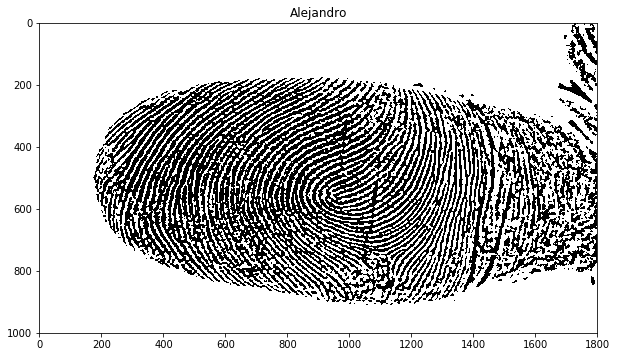

In [205]:
ale_print = cropped_photo_to_print(ale_gray_finger_zoom, 31, 4)

fig = plt.figure(figsize=(10, 10))
plt.title('Alejandro')
plt.imshow(ale_print[2], cmap='gray')

### Jack pt 2

Let's switch it up a bit...

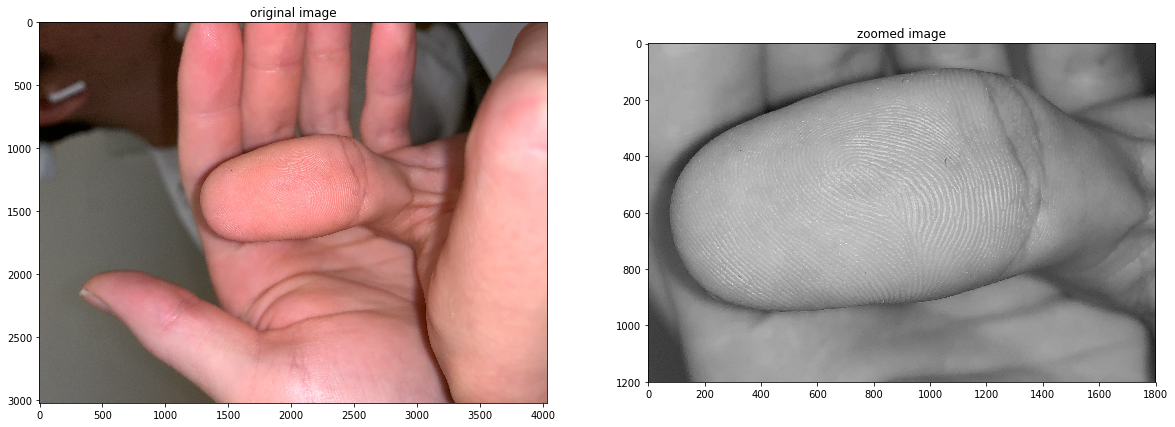

In [206]:
jack_finger_2 = skio.imread("Jack2.jpeg")
jack_gray_finger_2 = skc.rgb2gray(jack_finger_2)
jack_gray_finger_zoom_2 = jack_gray_finger_2[800:2000, 1200:3000]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.set_title('original image')
ax1.imshow(jack_finger_2, cmap='gray')
ax2.set_title('zoomed image')
ax2.imshow(jack_gray_finger_zoom_2, cmap='gray')

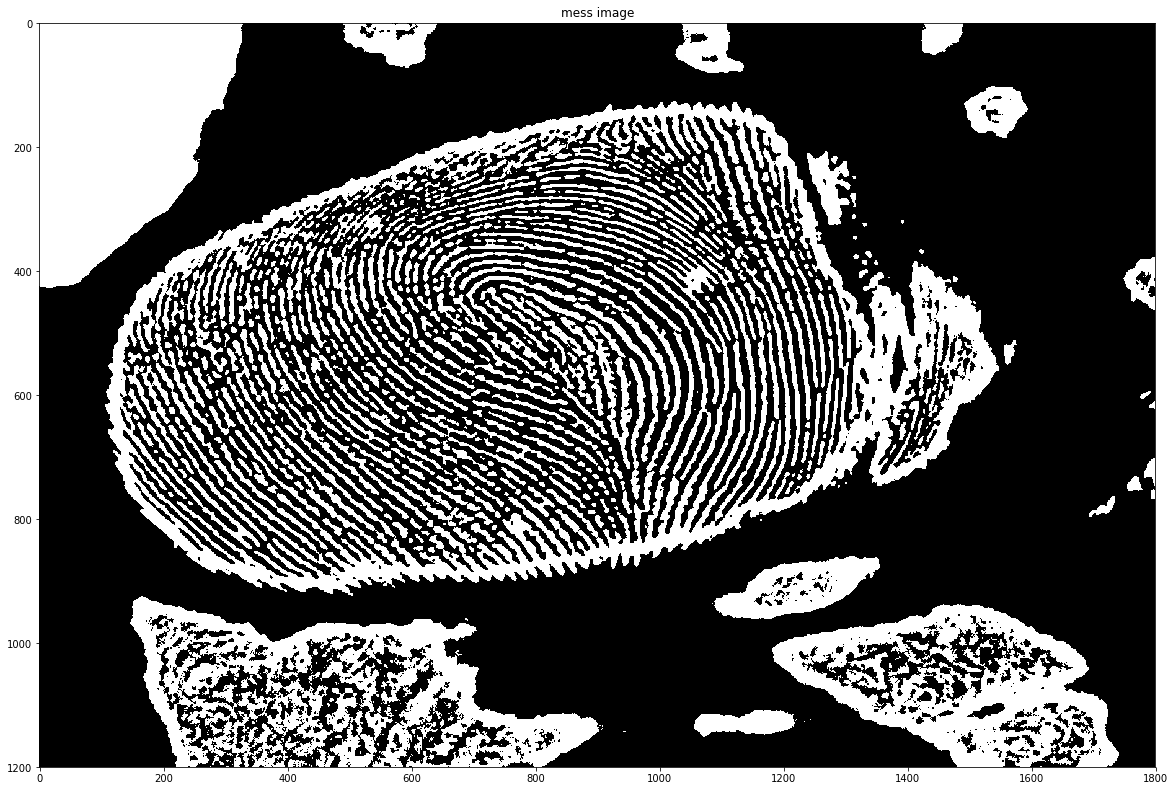

In [207]:
mess = cropped_photo_to_print(jack_gray_finger_zoom_2, 31, 4)

fig = plt.figure(figsize=(20, 20))
plt.title('mess image')
plt.imshow(mess[2], cmap='gray')

Well... We have some work to do